1. Upload Data to Colab

Upload your archive.zip dataset.

In [15]:
from google.colab import files

# Upload dataset
# uploaded = files.upload()

2. Load and preprocess data

In [16]:
import pandas as pd
import zipfile
import os

# Extract zip file
zip_file_path = "/content/Lung_Cancer_Dataset.zip"
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("./")

# Identify CSV file
extracted_files = os.listdir("./")
csv_file = [file for file in extracted_files if file.endswith('.csv')][0]
csv_file_path = f"./{csv_file}"

# Load dataset
df = pd.read_csv(csv_file_path)
df.head()


,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES


3. Handle Missing Values

In [17]:
# Fill missing values with mode
df.fillna(df.mode().iloc[0], inplace=True)

4. Convert Categorical Data to Numeric

In [18]:
# Convert Yes/No to 1/0
df.replace({'Yes': 1, 'No': 0}, inplace=True)
df.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES


5. Train a Random Forest Model

5.1 - Split Data

In [19]:
from sklearn.model_selection import train_test_split

# Define independent and dependent variables
X = df.drop(columns=['PULMONARY_DISEASE'])  # Adjust if needed
y = df['PULMONARY_DISEASE']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

5.2 - Train a random forest classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = rf_model.predict_proba(X_test)[:, 1]  # Get probability of "Lung Cancer = 1"
y_pred = rf_model.predict(X_test)


5.3 - Evaluate Model Performance

In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.904

Classification Report:
               precision    recall  f1-score   support

          NO       0.91      0.93      0.92       593
         YES       0.89      0.87      0.88       407

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



5.4 - Save Model as Pickle File

In [22]:
import joblib

# Save model
joblib.dump(rf_model, "lung_cancer_rf.pckl")

# Download the model to your local system
from google.colab import files
files.download("lung_cancer_rf.pckl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Features Used

In [23]:
print("Number of features:", X.shape[1])

Number of features: 17


Feature Importance Ranking:
1. SMOKING - 0.2121
2. ENERGY_LEVEL - 0.1546
3. THROAT_DISCOMFORT - 0.1111
4. BREATHING_ISSUE - 0.1072
5. OXYGEN_SATURATION - 0.0962
6. AGE - 0.0807
7. SMOKING_FAMILY_HISTORY - 0.0480
8. STRESS_IMMUNE - 0.0328
9. EXPOSURE_TO_POLLUTION - 0.0319
10. FAMILY_HISTORY - 0.0186
11. IMMUNE_WEAKNESS - 0.0162
12. CHEST_TIGHTNESS - 0.0155
13. ALCOHOL_CONSUMPTION - 0.0154
14. LONG_TERM_ILLNESS - 0.0153
15. MENTAL_STRESS - 0.0152
16. GENDER - 0.0152
17. FINGER_DISCOLORATION - 0.0140


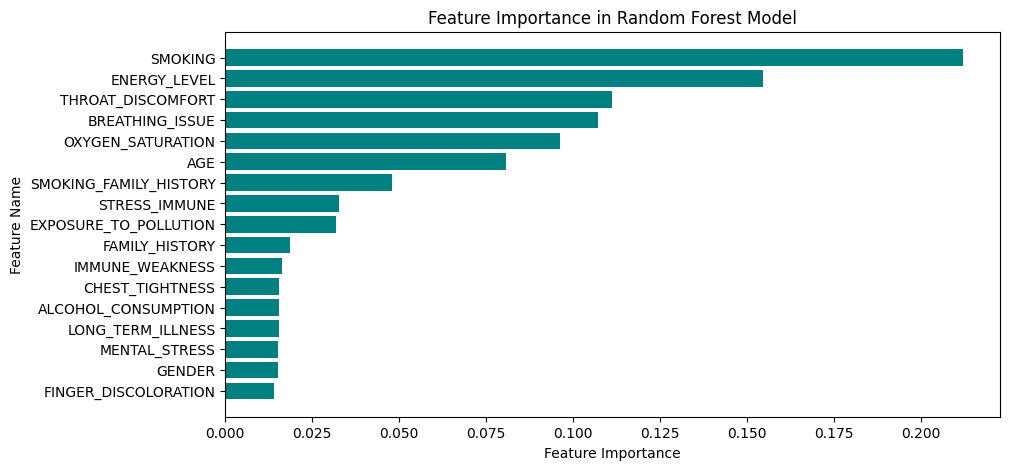

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
feature_importances = rf_model.feature_importances_

# Create a sorted list of feature importances
sorted_idx = np.argsort(feature_importances)[::-1]

# Print feature names with importance values
print("Feature Importance Ranking:")
for i, index in enumerate(sorted_idx):
    print(f"{i+1}. {X.columns[index]} - {feature_importances[index]:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx], color="teal")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()
plt.show()


Plot Feature Importance

In [25]:
import shap

# Initialize SHAP explainer
#explainer = shap.TreeExplainer(rf_model)
#shap_values = explainer.shap_values(X)  # Get SHAP values for all features

# Summary Plot
#shap.summary_plot(shap_values[1], X, feature_names=feature_names)

Probability Distribution of predictions

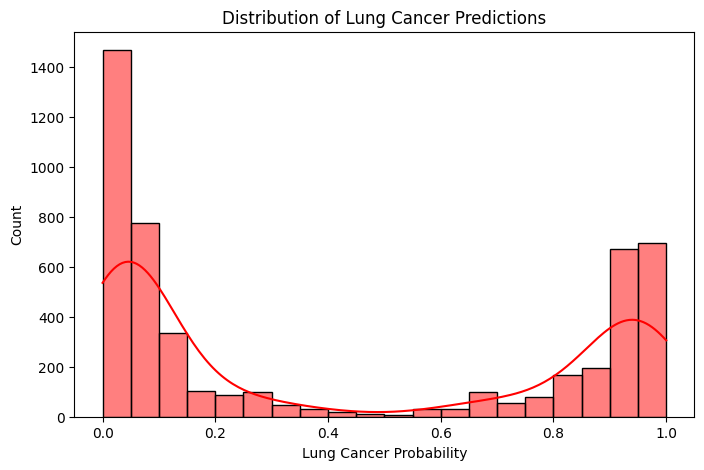

In [26]:
import seaborn as sns

# Get prediction probabilities
probabilities = rf_model.predict_proba(X)[:, 1]  # Extract lung cancer probability

plt.figure(figsize=(8, 5))
sns.histplot(probabilities, bins=20, kde=True, color='red')
plt.xlabel("Lung Cancer Probability")
plt.ylabel("Count")
plt.title("Distribution of Lung Cancer Predictions")
plt.show()


1️⃣ Probability Distribution Curve
🔍 What It Shows:

The spread of lung cancer risk predictions made by the model.
Helps identify whether the model is confident or uncertain about its predictions.
📊 Example:

If most predictions cluster around 0% or 100%, the model is confident.
If many predictions are between 40%-60%, the model is uncertain.

--------------------------------------------------------------------------------

Model Performance Curve

In [27]:
# Convert 'YES' to 1 and 'NO' to 0
y_test = y_test.map({'YES': 1, 'NO': 0})

# Compute ROC curve again
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='grey', linestyle="--")  # Random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Lung Cancer Prediction Model")
plt.legend()
plt.show()


NameError: name 'roc_curve' is not defined

 ROC Curve (Receiver Operating Characteristic)
🔍 What It Shows:

How well the model differentiates between "Lung Cancer" and "No Lung Cancer".
The trade-off between True Positive Rate (Sensitivity) and False Positive Rate (1 - Specificity).
📊 Key Terms:

True Positive Rate (TPR) = How many actual cancer cases were correctly detected.
False Positive Rate (FPR) = How many non-cancer cases were wrongly predicted as cancer.
AUC (Area Under Curve) = Measures the overall performance of the model.
AUC = 1.0 → Perfect Model
AUC = 0.5 → Random Guessing (Useless Model)
AUC > 0.8 → Good Model